In [68]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# vec = [6,5,-2,-2,-28,-25,-34,-38,-41,-42,-39,-49,-29,-10,-2,1,10,17,27,37,40,25,11,8,9,6,1,2,-6,7,10,21,21,23,21,19,27,19,31,22,22,12,22,31,24,34,38,35,32,40,47,39,42,43,36,24,19,19,12,4,3,3,-1,7,5,18,20,32,31,36,34,30,27,35,33,25,16,6,-3,-5,0,1,1,7,7,4,20,26,18,11,5,0,-10,-14,0,2,1,5,19,25]
# vec = [4.883323689094732,-4.049038263910857,-11.218506999639223,-16.789105082445893,-20.918115061716748,-23.756079471868034,-25.446800832346355,-26.12734164762867,-25.928024407222303,-24.97243158566492,-23.377405642524558,-21.253049022399637,-18.70272415491887,-15.823053454741382,-12.703919321556638,-9.428464140084511,-6.073090280075126,-2.7074600963090134,0.6055040714028141,3.8096198982191947,6.85544507426849,9.700277304648697,12.308154309427492,14.649853823642191,16.70289359729967,18.451531395303647,19.09261883644524,19.18256065602514,18.834431608414615,17.55467766458088,16.5089819146599,15.239922851311059,14.455527753177817,13.906955797117517,13.753773017491913,14.334107906819249,15.568122858731437,17.972141113591526,20.838921415716044,23.465340619568412,26.481648985901497,29.458886214856754,32.3533739029902,34.55736940213369,36.020671821011625,36.26442296914699,35.36683473784326,34.161884541280926,33.23674563787094,31.959633136001358,30.131823073258616,28.08406949499145,26.133356170729233,24.318350952562128,23.399818260849585,22.77902634348657,22.460190221761287,21.954408521469574,21.705397183787046,21.331479958783856,20.903029362460007,21.054871640190175,20.82659437986904,20.390975425891597,19.212060898149446,18.221660314723753,17.32778016130099,16.968984754522506,16.75990356721464,17.084671816179302,17.898268449311303,18.427864529192227,18.90135365842842,19.75235921885514,20.58195845754739,20.094489315912476,19.39931524025331,18.50118367772761,17.409876998454813,16.140212495597886,14.712042385362935,13.150253806999338,11.48476882279995,9.750544418100624,7.987572501280731,6.240879903762753,4.560528380012592,3.0016146075393095,1.6242701868954512,0.4936616416767663,-0.3200095814781676,-0.7415071128867297,-0.6905596598235348,-0.08186100651982287,1.174929985836748,3.175189379101319,6.019328158172861,9.812792230993075,14.666062428547121,20.694654504863855]
# manuscript 1
# vec = [20.329468451555005,21.799186204513596,23.429570347439356,25.166920706210355,26.960933402634083,28.764700854447444,30.53471177531675,32.23085117483774,33.81640035853556,35.258036927864765,36.525834780209344,37.593264108882686,38.4371914031276,39.037879448116314,39.37898732495045,39.447570410661086,39.23408037820868,38.732365196483116,37.9396691303037,36.85663274041913,35.48729288350755,33.839082712176484,31.92283167496293,29.752765516333238,27.346506276683208,24.72507229224046,20.9476891445508,16.75077337230973,12.527977111747031,8.339332521413983,4.464259569727499,0.9966403115346186,-2.162627015689648,-4.863658291296432,-6.994438956533944,-8.710684974659985,-10.017063721182812,-10.655418636154558,-10.626468886114866,-10.179762806874583,-9.496476083918308,-8.775577717640582,-7.877883374770653,-6.992038259018993,-5.9824934316397975,-4.906515096804385,-3.979561562940195,-3.163014966931915,-2.5212393340142203,-2.0048081420000115,-1.493255321903146,-1.1427912064747698,-0.9204341128407751,-0.9069104084063159,-1.2337849412917958,-1.9396584004862047,-2.7162539918235873,-3.260196294117354,-3.5207658188131825,-3.794462816314807,-3.990686103263939,-3.877967405333041,-3.2957461222379596,-2.2283201956290526,-0.5887959066673453,1.3031518508596558,3.2306015942982174,5.213203897647424,6.883801088015111,8.543390583454203,10.016892593281199,11.14856784649543,11.48951994938918,11.169577936601234,10.262998743488188,8.586105589218484,6.441153452663613,3.850669380228009,0.846170988476743,-2.5318335358238464,-6.23384543570565,-10.201375383999302,-14.366943483333774,-18.65407926613622,-22.977321694633016,-27.242219160848105,-31.34532948660473,-35.17421992352408,-38.60746715302598,-41.51465728632884,-43.75638586444998,-45.18425785820375,-45.6408876682046,-44.95989912486495,-42.965925488394745,-39.47460944880386,-34.292603125899745,-27.21756806928934,-18.038175258376153,-6.534105102363732]
# manuscript 2
vec = [9.353802977554585,16.4979839661306,22.64210727407181,27.835910281193293,32.128776589744255,35.569736024408044,38.207464632302155,40.090284682978236,41.26616466842204,41.78271930305352,41.6872095237267,41.02654248972979,39.84727158278515,38.19559640704924,36.117362789112704,33.65806277800029,30.862834645170928,27.77646288451765,24.443378212367648,20.907657567482254,17.21302411105694,13.402847226721335,9.52014252053918,5.6075718210083645,1.7074431790609648,-2.138289131928545,-7.111318393246709,-11.754080005007895,-16.34715349583644,-19.982378426274554,-23.31609470172089,-25.951671395071685,-28.017138244552868,-29.44612890580936,-30.301433211390098,-30.54863237206502,-30.207747738953216,-28.95173794479925,-27.302034612503885,-25.560665607699214,-22.80058293882631,-19.112858237632288,-14.905141473340134,-10.42710028060243,-5.439404622087878,0.3300968283363592,6.236487106040174,11.907359082413214,16.51707675509239,20.77809158033345,24.2703814709849,26.988490575131877,28.411281990148527,28.845246401063527,28.357452451326115,26.673261326614547,23.954809353302792,20.30380600098904,16.442211364974572,12.094186282180205,7.3328707563900934,2.1475496661847147,-2.439993142607168,-5.83574696253351,-9.5169427355985,-13.082896134206038,-16.427417388554247,-18.724354045767118,-20.208873564309158,-21.143284349166102,-21.584680863246074,-21.483229925585164,-20.912092087582963,-20.576509045929967,-21.131245437680466,-21.440263703432397,-21.51596941212267,-21.374841785043255,-21.03743369592193,-20.52837167092255,-19.87635588864485,-19.114160180124653,-18.278632028833865,-17.410692570680094,-16.555336594007326,-15.761632539595372,-15.082722500659731,-14.575822222852441,-14.302221104261069,-14.327282195409357,-14.720442199257153,-15.555211471200163,-16.909174019070118,-18.863987503134748,-21.505383236097646,-24.923166183098747,-29.211214961713356,-34.467481841953415,-40.79399274626677, -40.5]



len(vec)

100

In [143]:
def normalize(x, newRange=(0, 1)): #x is an array. Default range is between zero and one
    xmin, xmax = np.min(x), np.max(x) #get max and min from input array
    norm = (x - xmin)/(xmax - xmin) # scale between zero and one
    
    if newRange == (0, 1):
        return(norm) # wanted range is the same as norm
    elif newRange != (0, 1):
        return norm * (newRange[1] - newRange[0]) + newRange[0] #scale to a different range.    
    #add other conditions here. For example, an error message

In [144]:
differences = [vec[i] - vec[i+1] for i in range(len(vec)-1)]
differences.append(differences[-1])
diff_abs = [abs(differences[i]) for i in range(len(differences))]
diff_norm = normalize(diff_abs, newRange=(0, 100))
len(diff_norm)

100

In [145]:
diff_round = [round(diff_norm[i],0) for i in range(len(diff_norm))]
len(diff_round)

100

In [146]:
x = np.arange(0,100)

In [161]:
# manuscript 1
# diff_round[96] = 40
# diff_round[97] = 40
# diff_round[98] = 40
# diff_round[99] = 40

# manuscript 2
diff_round[0] = 35
diff_round[1] = 40
diff_round[2] = 40
diff_round[3] = 40

diff_round[98] = 40
diff_round[99] = 40


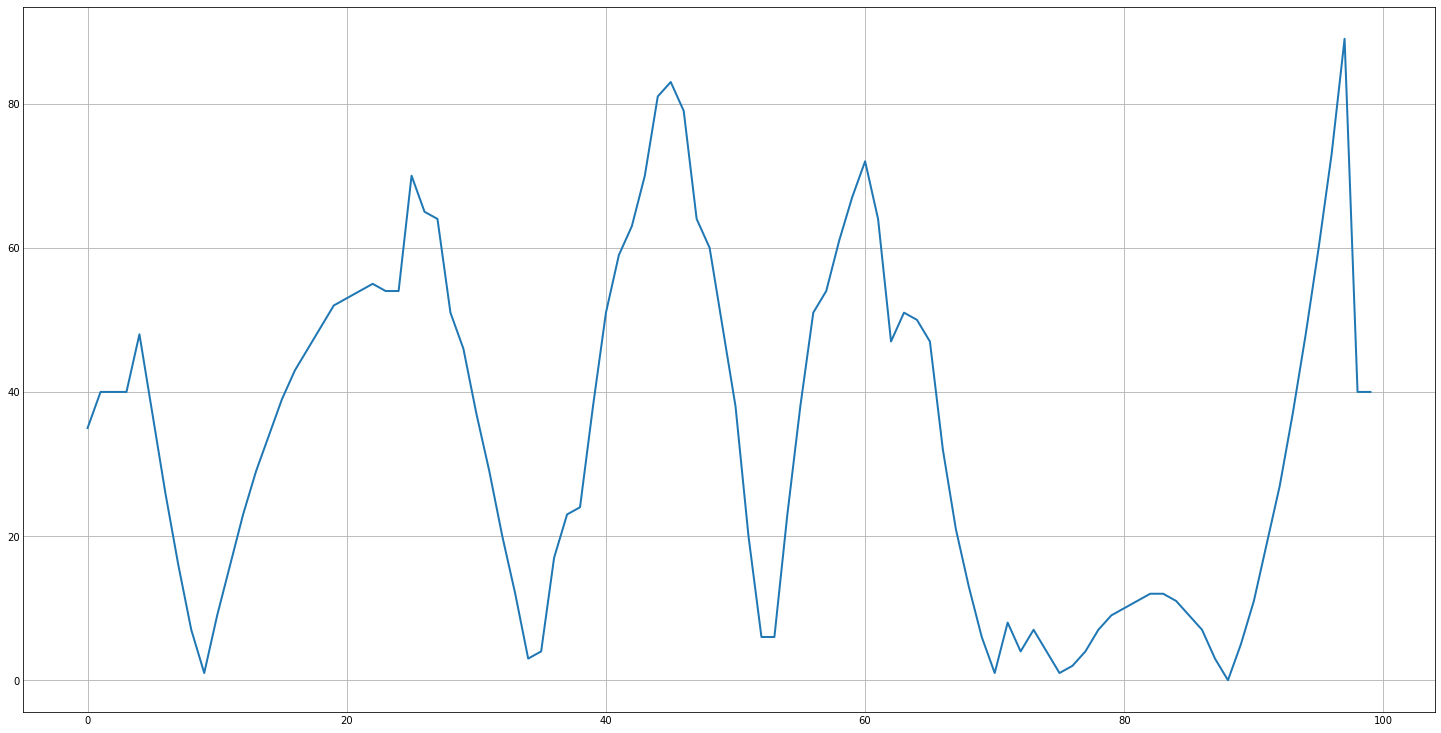

In [162]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x[:len(diff_round)], diff_round, linewidth=2.0)

plt.show()

In [163]:
y = savgol_filter(diff_round, 15, 4)
len(y)


100

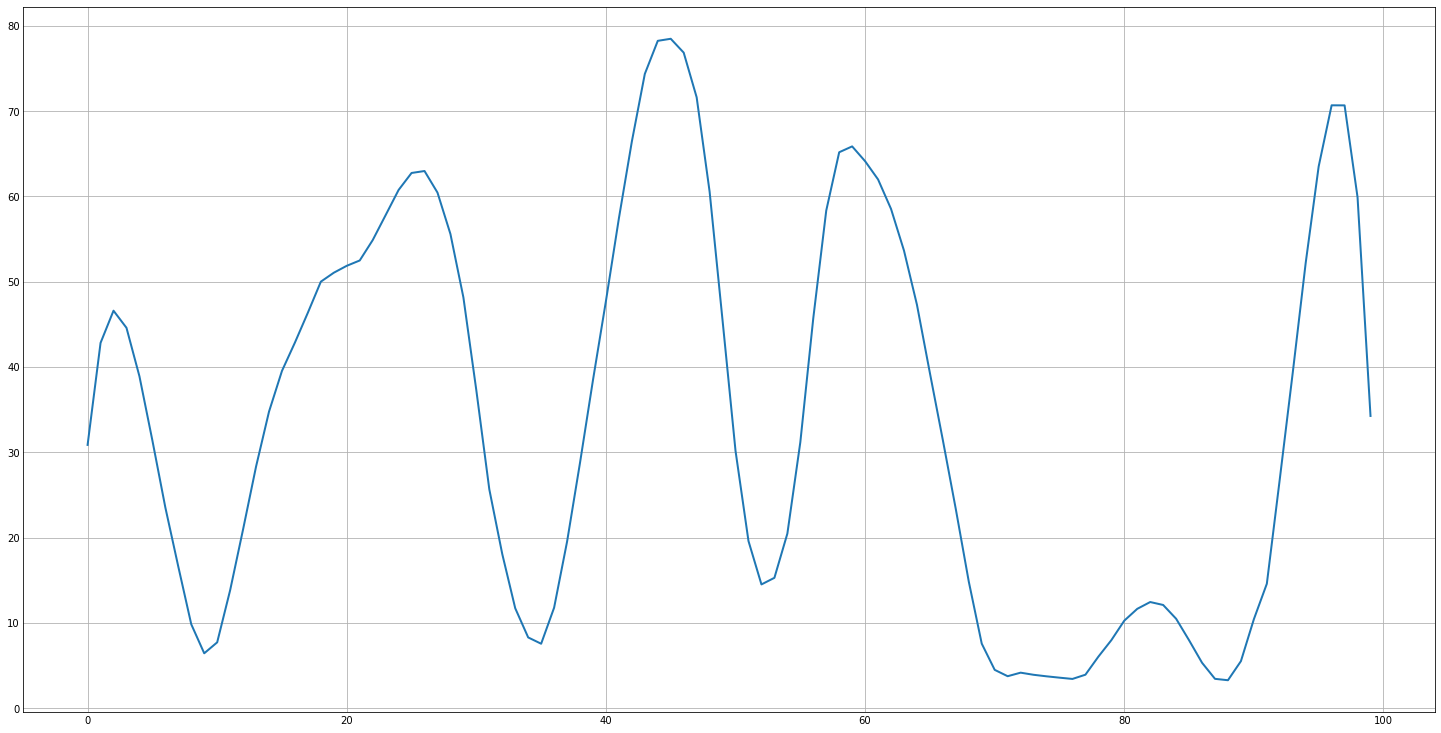

In [164]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x[:len(y)], y, linewidth=2.0)

plt.show()

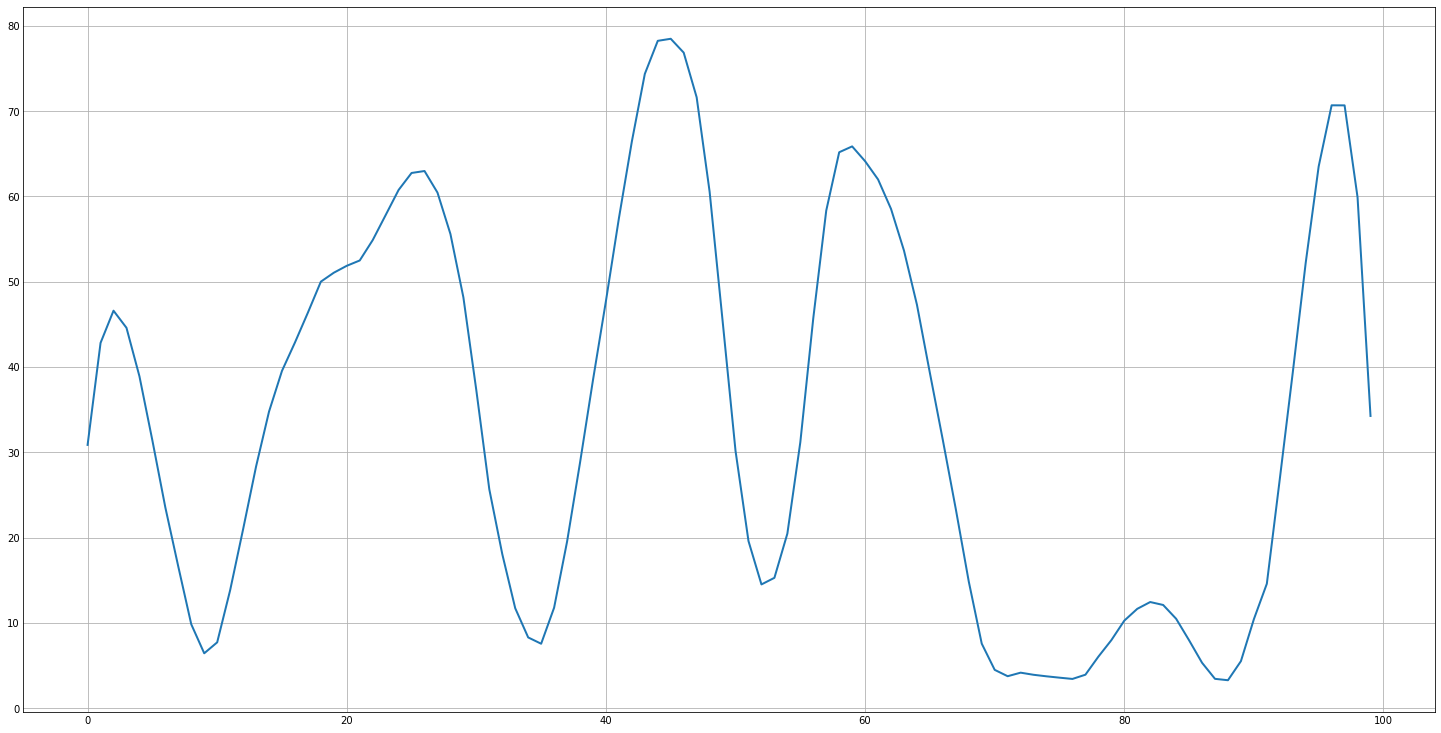

In [165]:
y_round = [round(y[i]) for i in range(len(y))]
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x[:len(y_round)], y, linewidth=2.0)

plt.show()

In [157]:
file = open(".tmp/output.txt", "w")
file.write('{' + ','.join(map(str, y_round)) + '}')
file.close()